In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection import ssd300_vgg16

# 데이터셋과 데이터 로더 준비
from torchvision.datasets import VOCDetection
from torch.utils.data import DataLoader

# 기타 필요한 라이브러리
import numpy as np
import matplotlib.pyplot as plt
# 미리 학습된 SSD 모델 로드
model = ssd300_vgg16(pretrained=True)

# 모델을 평가 모드로 설정
model.eval()

# 사용할 장치 설정(CPU 또는 GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
def get_transform():
    transforms = []
    # 이미지를 모델 입력 크기에 맞게 변환
    transforms.append(torchvision.transforms.Resize((300, 300)))
    transforms.append(torchvision.transforms.ToTensor())
    return torchvision.transforms.Compose(transforms)

# VOCDetection 데이터셋 불러오기
dataset = VOCDetection(root="./data/VOC2012", year="2012", image_set="val", download=True, transform=get_transform())

# 데이터 로더 준비
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)
def visualize_prediction(image, target, threshold=0.5):
    image = image.cpu().data
    image = transforms.functional.to_pil_image(image)
    plt.imshow(image)
    for box, label, score in zip(target["boxes"], target["labels"], target["scores"]):
        if score > threshold:
            plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', linewidth=2))
    plt.show()

# 하나의 이미지에 대해 예측 수행
image, _ = dataset[0]
image = image.unsqueeze(0).to(device)

with torch.no_grad():
    prediction = model(image)

# 결과 시각화
visualize_prediction(image.squeeze(0), prediction[0])


c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


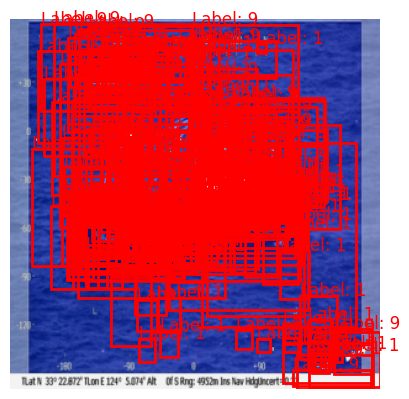

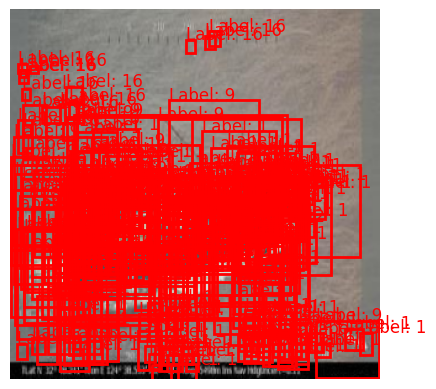

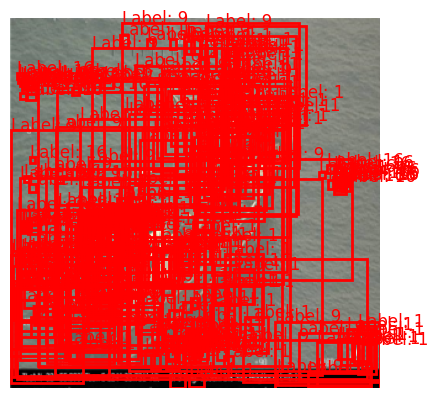

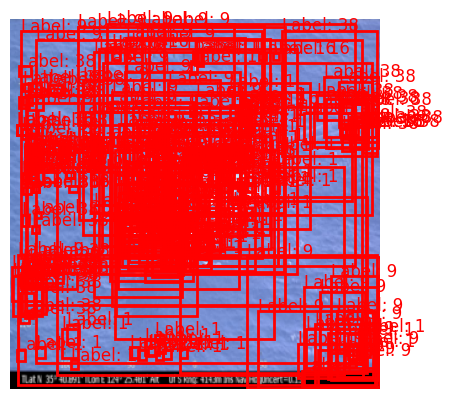

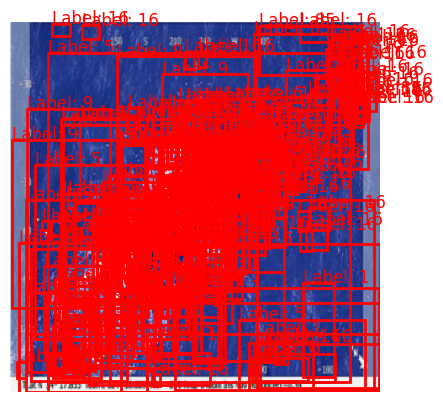

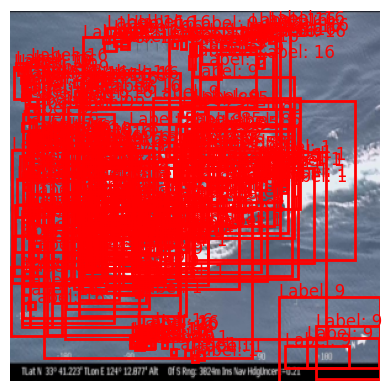

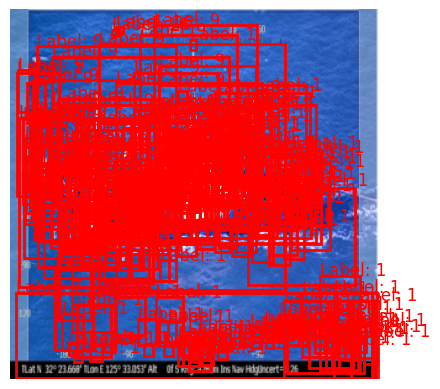

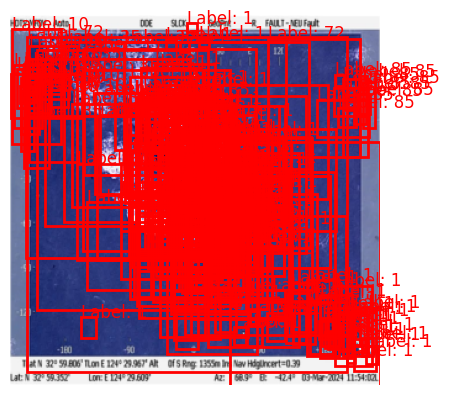

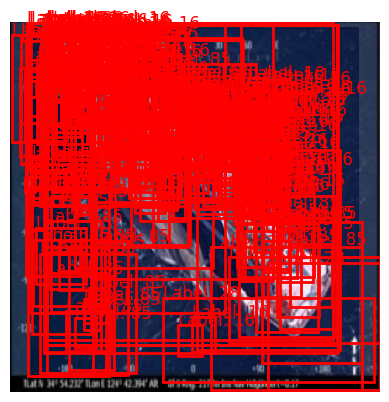

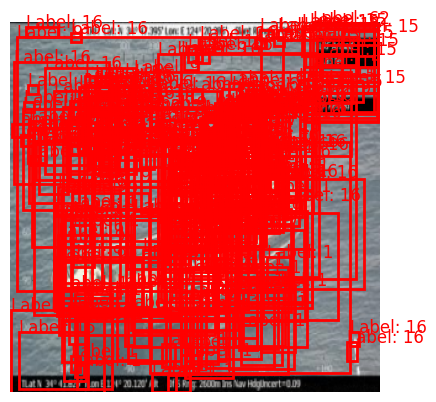

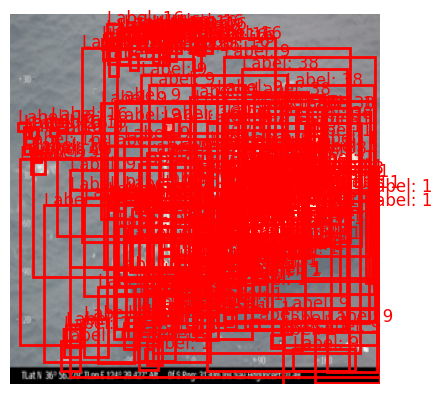

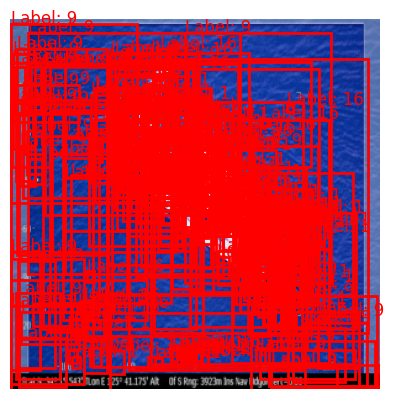

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.models.detection import ssdlite320_mobilenet_v3_large
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt

# 사용할 장치 설정(CPU 또는 GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 사용자 정의 데이터셋 클래스
class CustomImageDataset(Dataset):
    def __init__(self, image_paths, labels, boxes, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.boxes = boxes  # 바운딩 박스 좌표
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert("RGB")  # 이미지 열기 및 RGB로 변환
        
        label = self.labels[idx]
        box = self.boxes[idx]

        if self.transform:
            image = self.transform(image)

        # 바운딩 박스를 텐서로 변환
        box = torch.tensor(box, dtype=torch.float32)  # shape: [1, 4]
        
        # shape가 [1, 4]일 경우 squeeze를 사용하여 [4]로 변환
        if box.dim() == 2 and box.shape[0] == 1:
            box = box.squeeze(0)  # [1, 4] -> [4]

        # 타겟 구성 (박스와 레이블)
        target = {
            'boxes': box.unsqueeze(0),  # N=1로 맞춰주기 위해 다시 차원 추가
            'labels': torch.tensor([label], dtype=torch.int64)
        }

        return image, target

def get_transform():
    transforms = []
    # 이미지를 모델 입력 크기에 맞게 변환
    transforms.append(torchvision.transforms.Resize((300, 300)))
    transforms.append(torchvision.transforms.ToTensor())
    return torchvision.transforms.Compose(transforms)

# 1. 이미지 경로, 레이블, 바운딩 박스 설정
image_paths = [
    "C:/Users/Admin/Desktop/새 닭/madek/1.jpg",
    "C:/Users/Admin/Desktop/새 닭/madek/2.jpg",
    "C:/Users/Admin/Desktop/새 닭/madek/3.jpg",
    "C:/Users/Admin/Desktop/새 닭/madek/4.jpg",
    "C:/Users/Admin/Desktop/새 닭/madek/11.jpg",
    "C:/Users/Admin/Desktop/새 닭/madek/12.jpg",
    "C:/Users/Admin/Desktop/새 닭/madec/5.jpg",
    "C:/Users/Admin/Desktop/새 닭/madec/6.jpg",
    "C:/Users/Admin/Desktop/새 닭/madec/7.jpg",
    "C:/Users/Admin/Desktop/새 닭/madec/8.jpg",
    "C:/Users/Admin/Desktop/새 닭/madec/9.jpg",
    "C:/Users/Admin/Desktop/새 닭/madec/10.jpg"
]

# 레이블 설정 (국내 어선=0, 중국 어선=1)
labels = [0] * 6 + [1] * 6  # 앞 6개는 국내 어선, 뒤 6개는 중국 어선으로 설정

# 간단한 바운딩 박스 좌표 설정 (예시로 모든 이미지를 동일한 크기의 박스로 설정)
boxes = [
    [[50, 50, 250, 250]],  # [xmin, ymin, xmax, ymax] 좌표
    [[60, 60, 260, 260]],
    [[70, 70, 270, 270]],
    [[80, 80, 280, 280]],
    [[90, 90, 290, 290]],
    [[100, 100, 300, 300]],
    [[110, 110, 310, 310]],
    [[120, 120, 320, 320]],
    [[130, 130, 330, 330]],
    [[140, 140, 340, 340]],
    [[150, 150, 350, 350]],
    [[160, 160, 360, 360]],
]

# 데이터셋 생성
transform = get_transform()
dataset = CustomImageDataset(image_paths, labels, boxes, transform=transform)

# 데이터 로더 준비
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# 미리 학습된 SSD 모델 로드
model = ssdlite320_mobilenet_v3_large(pretrained=True)

# 모델을 평가 모드로 설정
model.eval()
model.to(device)

def visualize_prediction(image, target, threshold=0.5):
    image = image.cpu().data
    image = transforms.functional.to_pil_image(image)
    plt.imshow(image)
    for box, label in zip(target["boxes"], target["labels"]):
        plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', linewidth=2))
        plt.text(box[0], box[1], f'Label: {label.item()}', color='red', fontsize=12)
    plt.axis('off')
    plt.show()

# 하나의 이미지에 대해 예측 수행
for i in range(len(dataset)):
    image, target = dataset[i]
    image = image.unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(image)

    # 결과 시각화
    visualize_prediction(image.squeeze(0), prediction[0])
